# Data Science Project - NYC GeoData
## Midterm report

## Team Members:
### Dhruv Anand (danand), Abhik Mondal (abhikm)

The objective of this project is to try and glean interesting observations from a geographical datasets relating to NYC. Information from different datasets will be combined to answer interesting connections about the behavior of people in New York.

In [1]:
import geopandas as gpd
import pandas as pd
import shapely
from shapely.geometry import Polygon,Point
from geopy.geocoders import GoogleV3
import rtree
import numpy as np
import re
import seaborn as sns
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

/Users/dhruv/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
boros = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
zips = gpd.GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp').to_crs({'init': 'epsg:4326'})
non_decimal = re.compile(r'[^\s\d.-]+')
subways = pd.read_csv('DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv')
subways['geometry'] = subways['the_geom'].apply(lambda z: Point(map(float,non_decimal.sub('', z).strip().split(' '))))
subways = gpd.GeoDataFrame(subways)
uber = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')
uber['geometry'] = [Point(xy) for xy in zip(uber.Lon, uber.Lat)]
uber = gpd.GeoDataFrame(uber)
uber.crs = {'init': 'epsg:4326'}
fhv = pd.read_csv('../fhv_tripdata_2016-01.csv')

In [3]:
print boros.head()

   BoroCode       BoroName    Shape_Area     Shape_Leng  \
0         5  Staten Island  1.623819e+09  330476.026530   
1         2          Bronx  1.186816e+09  464081.177750   
2         1      Manhattan  6.364540e+08  358410.655945   
3         3       Brooklyn  1.937484e+09  741039.196851   
4         4         Queens  3.044830e+09  895715.765066   

                                            geometry  
0  (POLYGON ((-74.05050806403248 40.5664220341941...  
1  (POLYGON ((-73.89680883223768 40.7958084451931...  
2  (POLYGON ((-74.01092841268033 40.6844914725762...  
3  (POLYGON ((-73.86706149472113 40.5820879768267...  
4  (POLYGON ((-73.83668274106698 40.5949466970491...  


In [ ]:
uber = uber[:1000]
uber.plot()
def create_dataframe(fn,Lat,Lon,lim=1000000):
    df = pd.read_csv(fn,nrows=lim)
    df=df[df[Lon]!=0.0]
    df['geometry'] = [Point(xy) for xy in zip(df[Lon], df[Lat])]
    df = gpd.GeoDataFrame(df)
#     df.crs = {'init':'epsg:4326'}
    df =  
    #df= gpd.sjoin(df,boros, how ="inner", op="intersects")
    return df

uber = create_dataframe('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv','Lon','Lat')
# taxi = create_dataframe('trip_data_1_cut2.csv','pickup_longitude','pickup_latitude',1000)

def removeExternalTrips(df,boros):
    return gpd.sjoin(df, boros, how="inner", op='intersects')
withinBoros = removeExternalTrips(df,boros)
withinBoros.head()
base = boros.plot()
withinBoros.plot(ax=base)
# boro_boundary.plot()
# uber[uber.geometry.within(boro_boundary)].plot()
# type(boros.unary_union)
# print fhv.head()
# print uber.head()
# len(sorted(fhv['Dispatching_base_num'].value_counts(dropna=False).keys()))


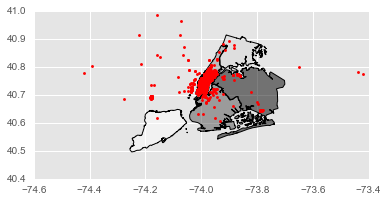

In [4]:
# print withinBoros.head()
# plt.figure(15,1)
base = boros.plot()
# zips.plot(ax=base);
# circles= subways.buffer(0.005)
# mp = circles.unary_union
# boros['geometry'].intersection(mp)
# circles.plot(ax=base)
# uber[:100].loc[boros.contains(uber[:100])].plot()

# uber[:100][uber[:100].within(boros)]
uber[:1000].plot(ax=base, color='red',markersize=2.9)
# subways.plot(ax=base, color='red',markersize=0.1);

In [5]:
len(uber)

564516

In [6]:
print uber.crs

{'init': 'epsg:4326'}
